In [2]:
import sys
import pandas as pd
from pandas.api.types import is_object_dtype as ObjectDtype
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import exists    

In [3]:
#Reading files
def ReadingFile():
    read = False
    path = input("Please enter the path of the file: ")
    path = CheckExistence(path)
    while(not read):
        extension = path.split(".")[-1]
        match(extension):
            case("csv"):
                read = True
                return (pd.read_csv(path))
            case("xls"):
                read = True
                return (pd.read_excel(path))
            case("sql"):
                read = True
                return (pd.read_sql(path))
            case(_):
                path = input("Please enter a supported file type 'csv' or 'xlc' or 'sql': ")
                path = CheckExistence(path)



In [4]:
# checking path existence
def CheckExistence(path):
    while(not exists(path)):
        path = input("Please enter a valid file path like 'Drive:\folder1\folder2\example.csv': ")
    return path        




In [5]:
def DataInfo(df):
     print("--------------- DataHead ---------------")
     print(df.head(10))
     print("--------------- DataDescribtion ---------------")
     print(df.describe())
     print("--------------- DataInfo ---------------")
     print(df.info())
     print("--------------- DataNunique ---------------")
     print(df.nunique())


In [6]:
def DataPreProcess(df):
    df = HandleNan(df)
    return df

def HandleNan(df):
    if(df.isnull().any(axis=1).sum() <= (df.shape[0]/10)):
        return df.dropna()
    else:
        return df.fillna(df.mean())



In [7]:
def Visualize(df,col):
    if(ObjectDtype(df[col])):
            plt.figure()
            plt.hist(df[col], rwidth=0.9)
            plt.title(col)
            plt.show()
            plt.figure()
            plt.scatter(pd.DataFrame(df[col].value_counts()).T.columns, df[col].value_counts())
            plt.title(col)
            plt.show()     
            plt.figure()
            sns.countplot(x=col,data=df,lw=0)
            plt.title(col)
            plt.show()
            plt.figure()
            plt.pie(df[col].value_counts(),labels=pd.DataFrame(df[col].value_counts()).T.columns)
            plt.title(col)
            plt.show()
    else:
        plt.figure()
        plt.hist(df[col], rwidth=0.9)     
        plt.title(col)
        plt.legend()
        plt.show()
        plt.figure()
        df[col].plot(kind="density")
        plt.title(col)
        plt.legend()
        plt.show()
        plt.figure()
        sns.boxplot(df[col])
        plt.title(col)
        plt.legend()
        plt.show()
        plt.figure()
        sns.violinplot(df[col])
        plt.title(col)
        plt.legend()
        plt.show()
        df_z_scaled = df.copy()
        df_z_scaled[col] = (df_z_scaled[col] - df_z_scaled[col].mean()) / df_z_scaled[col].std()    
        print("-------Normalized column-------")
        print(df_z_scaled[col])
        plt.figure()
        plt.hist(df_z_scaled[col], rwidth=0.9)     
        plt.title("Normalized"+" "+col)
        plt.legend()
        plt.show()
        plt.figure()
        df_z_scaled[col].plot(kind="density")
        plt.title("Normalized"+" "+col)
        plt.legend()
        plt.show()
        plt.figure()
        sns.boxplot(df_z_scaled[col])
        plt.title("Normalized"+" "+col)
        plt.legend()
        plt.show()
        plt.figure()
        sns.violinplot(df_z_scaled[col])
        plt.title("Normalized"+" "+col)
        plt.legend()
        plt.show()
pd.set_option('display.max_columns', None)


Please enter the path of the file: C:\Users\Eng.Mohamed Ahmed\Downloads\Compressed\archive\International_Report_Departures.csv
--------------- DataHead ---------------
     data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id fg_apt  \
0  05/01/2006  2006      5       12016     GUM        5      13162    MAJ   
1  05/01/2003  2003      5       10299     ANC        1      13856    OKO   
2  03/01/2007  2007      3       10721     BOS       13      12651    KEF   
3  12/01/2004  2004     12       11259     DAL       74      16271    YYZ   
4  05/01/2009  2009      5       13303     MIA       33      11075    CMW   
5  10/01/2007  2007     10       14761     SFB       33      11928    GLA   
6  02/01/2002  2002      2       14100     PHL       23      11032    CUN   
7  02/01/2008  2008      2       16091     YIP       43      16166    YQG   
8  11/01/2001  2001     11       13930     ORD       41      16042    YEG   
9  07/01/2003  2003      7       13198     MCI       64      1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0         20177
1         20007
2         20402
3         20201
4         21323
          ...  
930803    20398
930804    19770
930805    20398
930806    19534
930807    19542
Name: airlineid, Length: 927753, dtype: int64


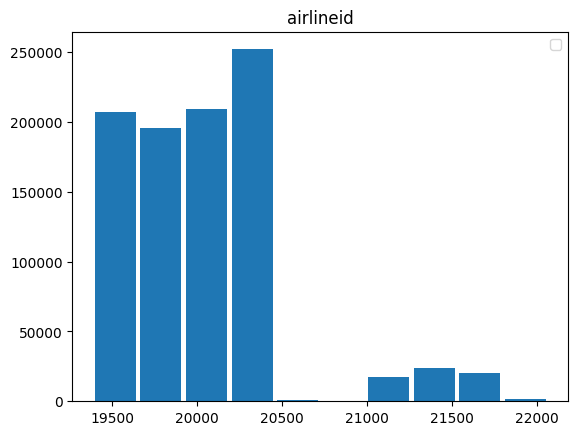

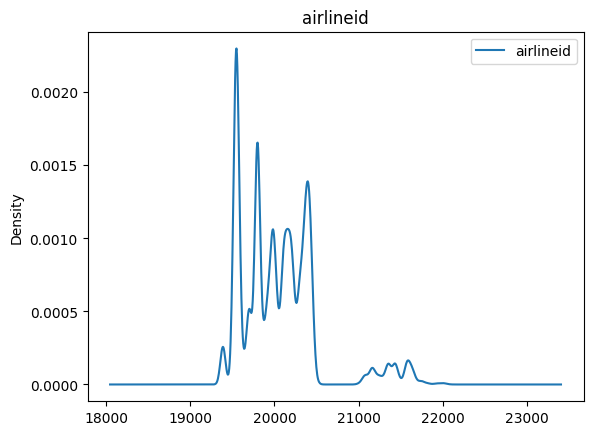

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


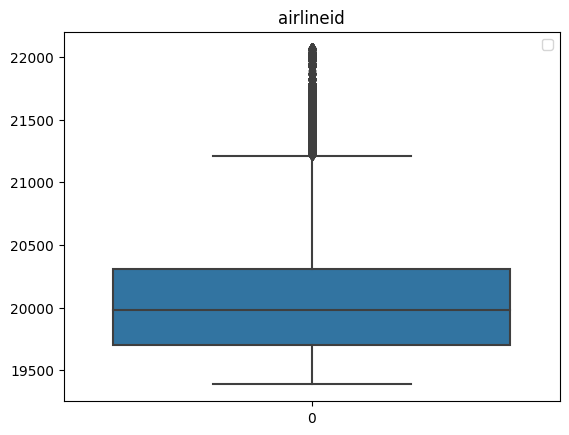

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


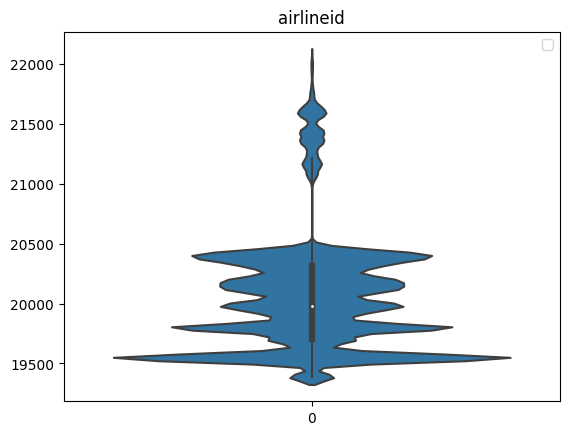

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-------Normalized column-------
0         0.252303
1        -0.102293
2         0.721620
3         0.302363
4         2.642691
            ...   
930803    0.713276
930804   -0.596640
930805    0.713276
930806   -1.088901
930807   -1.072215
Name: airlineid, Length: 927753, dtype: float64


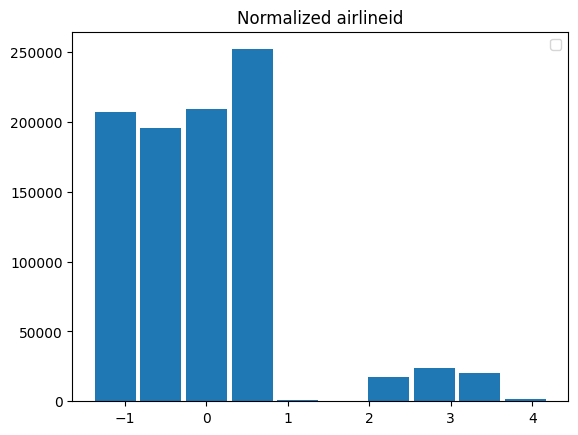

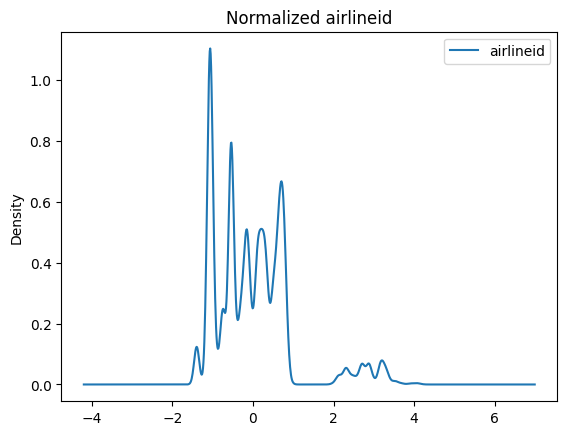

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


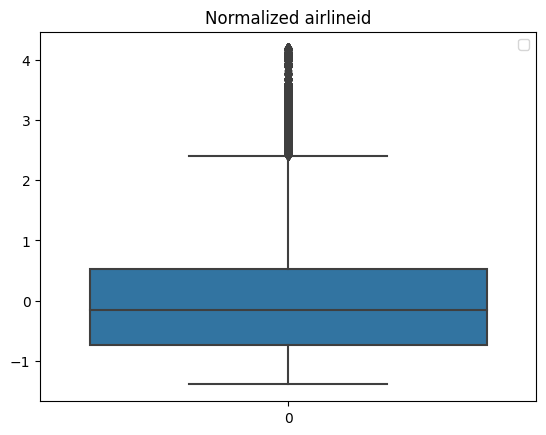

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


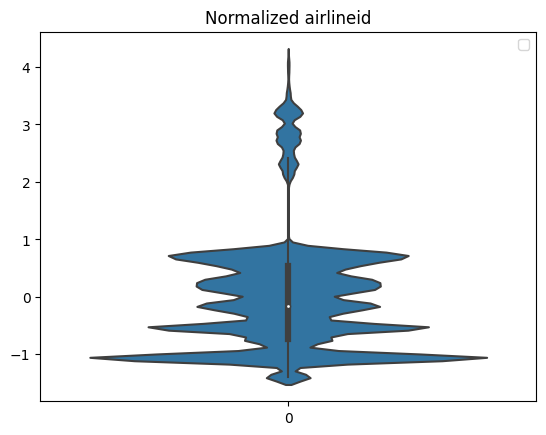

Please choose a column to visualize or Type 'exit' to close the program: Scheduled


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0            0
1            0
2            0
3            0
4            0
          ... 
930803    1422
930804    1439
930805    1441
930806    1461
930807    2019
Name: Scheduled, Length: 927753, dtype: int64


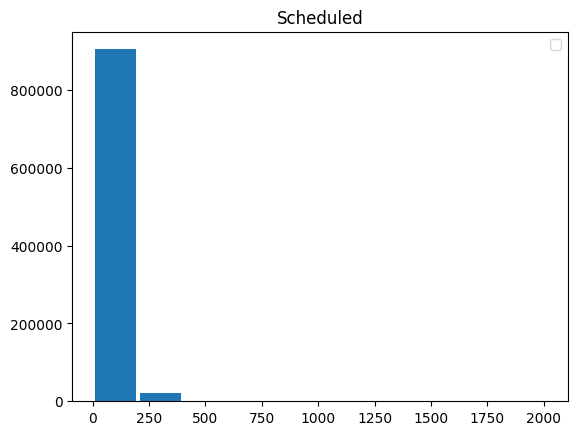

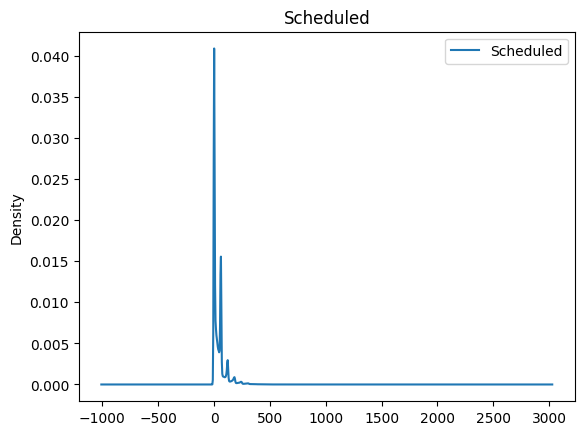

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


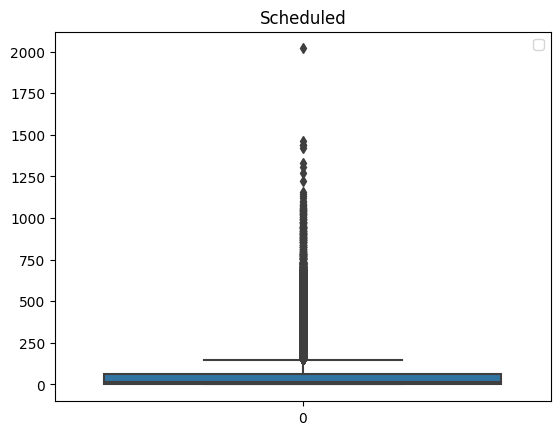

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


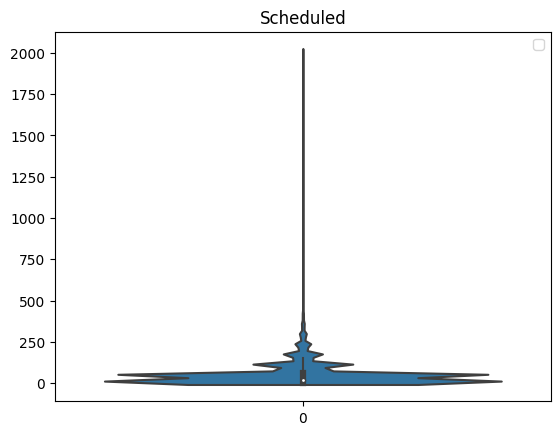

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-------Normalized column-------
0         -0.657174
1         -0.657174
2         -0.657174
3         -0.657174
4         -0.657174
            ...    
930803    22.765184
930804    23.045198
930805    23.078141
930806    23.407569
930807    32.598621
Name: Scheduled, Length: 927753, dtype: float64


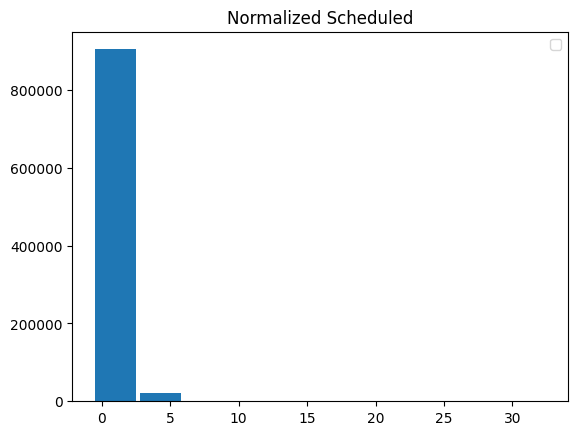

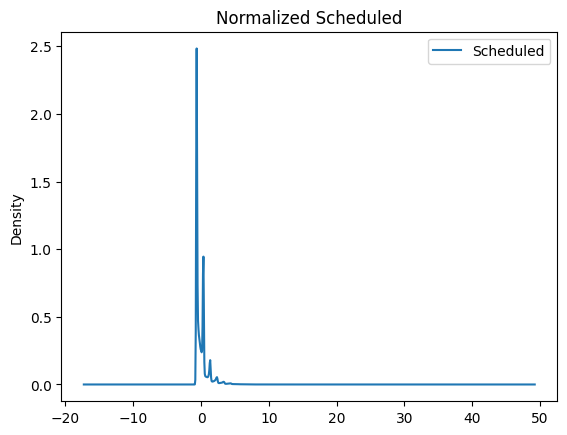

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


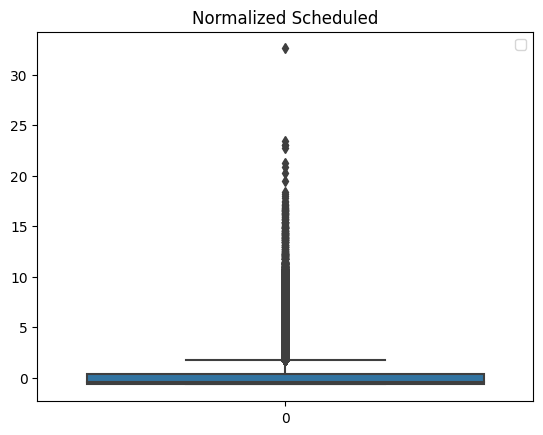

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


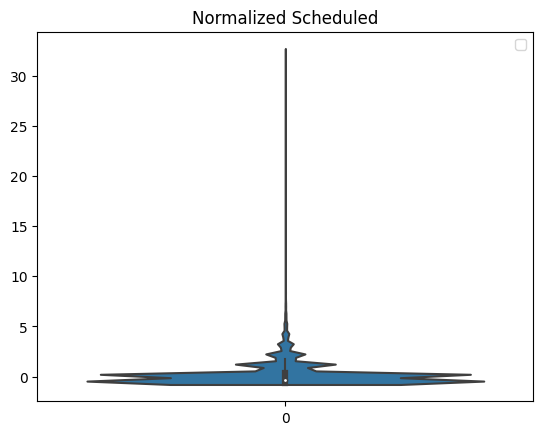

Please choose a column to visualize or Type 'exit' to close the program: exit


SystemExit: 

E:\Anaconda\envs\mywork\lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
df = ReadingFile()
df = DataPreProcess(df)
DataInfo(df)

column = input("Please choose a column to visualize or Type 'exit' to close the program: ")

while(column!="exit"):
    while (column!="exit"):
        try:
            print(df[column])
        except:
            column = input("Please enter a valid column name: ")
        else:
            break
    if(column!="exit"):
        Visualize(df,column)
        column = input("Please choose a column to visualize or Type 'exit' to close the program: ")

sys.exit()
